<a href="https://colab.research.google.com/github/SiddhanthNB/India-Covid19/blob/master/Covid19_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About **Covid-19** 
Coronavirus disease 2019 (COVID‑19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).It was first identified in December 2019 in Wuhan, Hubei, China, and has resulted in an ongoing pandemic.

The outbreak has been declared an epidemic in more than a dozen states and union territories, where provisions of the Epidemic Diseases Act, 1897 have been invoked, and educational institutions and many commercial establishments have been shut down. India has suspended all tourist visas, as a majority of the confirmed cases were linked to other countries.

In this Notebook we will make analysis on statewise covid-19 cases in India.

## Loading Packages

In [ ]:
import numpy as np
import pandas as pd
import requests
import json
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from datetime import date
today = date.today()
todays_date = today.strftime("%B %d,%Y")
todays_date

'August 20,2020'

# Getting the Data.

Why to load an outdated dataset file? In lieu, we can access live and updated data from websites API.

Here website providing API is https://covidindiatracker.com/ and its [Json link.](https://api.covidindiatracker.com/state_data.json)

In [ ]:
url = "https://api.covidindiatracker.com/state_data.json"
JSONContent = requests.get(url).json()
#content = json.dumps(JSONContent, indent = 4, sort_keys=True)
#print(content) 

state = []
active = []
confirmed = []
recovered =[]
deaths = []

for i in range(0,37):
  if JSONContent[i]['confirmed'] > 0:       #here we are only taking states which have atleast 1 covid19 case.
    state.append(JSONContent[i]['state'])   
    confirmed.append(JSONContent[i]['confirmed'])
    active.append(JSONContent[i]['active'])
    recovered.append(JSONContent[i]['recovered'])
    deaths.append(JSONContent[i]['deaths'])
  else:
    print("States/UT with no Covid19 cases till",todays_date,"is/are:", JSONContent[i]['state'])

data_list = [state,confirmed,active,recovered,deaths]              

States/UT with no Covid19 cases till August 20,2020 is/are: Lakshadweep


In [ ]:
covid_data = pd.DataFrame(data_list)
covid_data = covid_data.transpose()
covid_data.columns = ["State/UT","Total Cases","Active","Recovered","Deaths"] 

In [ ]:
df =covid_data.copy() 
covid_data.to_csv("covid-19-statewise.csv") #saving a copy of extracted data.
df

,State/UT,Total Cases,Active,Recovered,Deaths
0,Maharashtra,628642,160728,446881,21033
1,Tamil Nadu,355449,53155,296171,6123
2,Andhra Pradesh,316003,86725,226372,2906
3,Karnataka,249590,81113,164150,4327
4,Uttar Pradesh,167510,49645,115227,2638
5,Delhi,156139,11137,140767,4235
6,West Bengal,125922,27678,95663,2581
7,Bihar,112759,27613,84578,568
8,Telangana,97424,21509,75186,729
9,Assam,84318,23756,60349,213


# Exploratory Data Analysis(EDA):

In [ ]:
total_cases = df['Total Cases'].sum()
print('Total number of confirmed COVID-19 cases across India till',todays_date,':', total_cases)

active_cases = df['Active'].sum()
print('Total number of confirmed COVID-19 active cases across India till',todays_date,':', active_cases)

deaths = df['Deaths'].sum()
print('Total number of confirmed COVID-19 deaths across India till',todays_date,':', deaths)

cured_cases = df['Recovered'].sum()
print('Total number of confirmed COVID-19 recoveries across India till',todays_date,':', cured_cases)

Total number of confirmed COVID-19 cases across India till August 20,2020 : 2838439
Total number of confirmed COVID-19 active cases across India till August 20,2020 : 683578
Total number of confirmed COVID-19 deaths across India till August 20,2020 : 54009
Total number of confirmed COVID-19 recoveries across India till August 20,2020 : 2097760


In [ ]:
mortality_rate = round((deaths/total_cases)*100,2)
print('Mortality rate in India till',todays_date,':', mortality_rate,"%")

recovery_rate = round((cured_cases/total_cases)*100,2)
print('Recovery rate in India till',todays_date,':', recovery_rate,"%")

Mortality rate in India till August 20,2020 : 1.9 %
Recovery rate in India till August 20,2020 : 73.91 %


# Data Visualisation

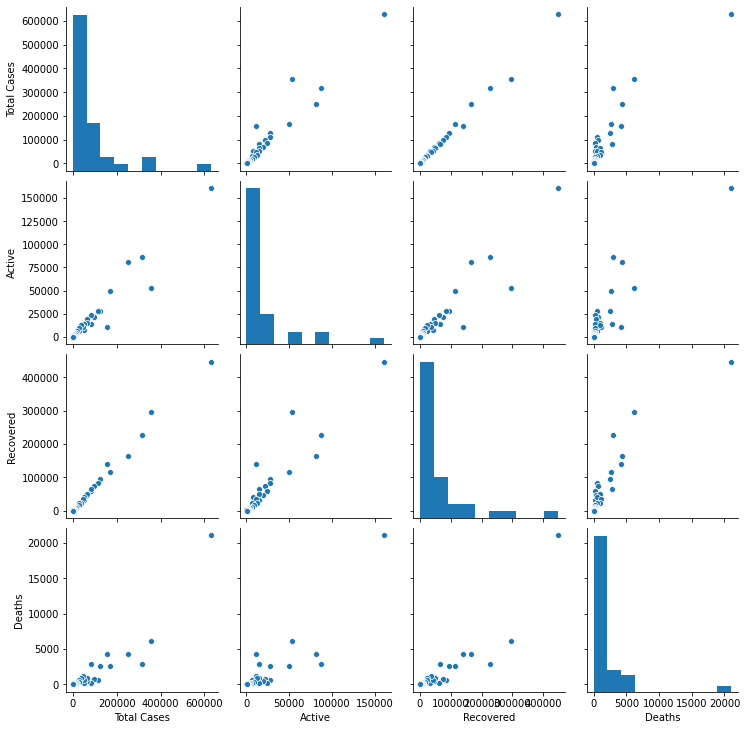

In [ ]:
sns.pairplot(df, palette="Set1")

In [ ]:
tmp = df.copy()
tmp = tmp.loc[:, ['State/UT', 'Total Cases', 'Recovered','Deaths']]
tmp.style.background_gradient(cmap='Blues',subset=["Total Cases"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])

,State/UT,Total Cases,Recovered,Deaths
0,Maharashtra,628642,446881,21033
1,Tamil Nadu,355449,296171,6123
2,Andhra Pradesh,316003,226372,2906
3,Karnataka,249590,164150,4327
4,Uttar Pradesh,167510,115227,2638
5,Delhi,156139,140767,4235
6,West Bengal,125922,95663,2581
7,Bihar,112759,84578,568
8,Telangana,97424,75186,729
9,Assam,84318,60349,213


In [ ]:
active = df['Active'].sum()
labels = ['Active','Recovered','Deaths']
values = [active, df['Recovered'].sum(), sum(df['Deaths'])]
fig1 = go.Figure(data=[go.Pie(labels=labels, values=values)],layout=go.Layout(title='India Corona Virus Cases'))
fig1.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=['#263fa3', '#2fcc41','#cc3c2f'], line=dict(color='#FFFFFF', width=2)))
fig1.update_layout(title_text='Current Situation in India according to www.covid19india.org',plot_bgcolor='rgb(275, 270, 273)')
fig1.show()

In [ ]:
fig = px.bar(df.sort_values('Total Cases', ascending=False).sort_values('Total Cases', ascending=True), 
             x="Total Cases", y="State/UT", 
             title='Statewise Total Active Cases till today', 
             text='Total Cases', 
             orientation='h', 
             width=1000, height=700, range_x = [0, max(df['Total Cases'])])
fig.update_traces(marker_color='#1B13E9', opacity=0.8, textposition='inside')

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [ ]:
fig = px.bar(df.sort_values('Active', ascending=False).sort_values('Active', ascending=True), 
             x="Active", y="State/UT", 
             title='Statewise Total Active Cases till today', 
             text='Active', 
             orientation='h', 
             width=1000, height=700, range_x = [0, max(df['Active'])])
fig.update_traces(marker_color='#FF0000', opacity=0.8, textposition='inside')

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

## Statewise Mortality and Recovery Rates

In [ ]:
data = pd.read_csv("covid-19-statewise.csv")
df1 = data.copy()
df1['Recovery Rate'] = round((df1['Recovered']/df1['Total Cases'])*100, 2)
df1 = df1[df1['Total Cases']>100]
df1 = df1.sort_values('Recovery Rate', ascending=False)
fig = px.bar(df1.sort_values(by="Recovery Rate", ascending=False)[:30][::-1],
             x = 'Recovery Rate', y = 'State/UT', 
             title='Recoveries per 100 Confirmed Cases', text='Recovery Rate', height=600, orientation='h',
             color_discrete_sequence=['#2ca02c'])   
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [ ]:
df2 = data.copy()
df2['Mortality Rate'] = round((df1['Deaths']/df1['Total Cases'])*100, 2)
df2 = df2[df2['Total Cases']>100]
df2 = df2.sort_values('Mortality Rate', ascending=False)
fig = px.bar(df2.sort_values(by="Mortality Rate", ascending=False)[:30][::-1],
             x = 'Mortality Rate', y = 'State/UT', 
             title='Mortality Rate per 100 Confirmed Cases', text='Mortality Rate', height=600, orientation='h',
             color_discrete_sequence=['darkred'])   
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')
fig.show()

## Symptoms observed in COVID-19 patients

COVID-19 typically causes flu-like symptoms including a fever and cough.

In some patients - particularly the elderly and others with other chronic health conditions - these symptoms can develop into pneumonia, with chest tightness, chest pain, and shortness of breath.

It seems to start with a fever, followed by a dry cough.

After a week, it can lead to shortness of breath, with about 20% of patients requiring hospital treatment.

Notably, the COVID-19 infection rarely seems to cause a runny nose, sneezing, or sore throat (these symptoms have been observed in only about 5% of patients). Sore throat, sneezing, and stuffy nose are most often signs of a cold. [Source](https://www.worldometers.info/coronavirus/coronavirus-symptoms/)

In [ ]:
symptoms={'symptoms':['Fever','Tiredness','Dry-cough','Shortness of breath','aches and pains','Sore throat','Diarrhoea','Nausea','vomiting','abdominal pain'],'percentage':[98.6,69.9,82,16.6,14.8,13.9,10.1,10.1,3.6,2.2]
    
}
symptoms=pd.DataFrame(data=symptoms,index=range(10))
symptoms

,symptoms,percentage
0,Fever,98.6
1,Tiredness,69.9
2,Dry-cough,82.0
3,Shortness of breath,16.6
4,aches and pains,14.8
5,Sore throat,13.9
6,Diarrhoea,10.1
7,Nausea,10.1
8,vomiting,3.6
9,abdominal pain,2.2


In [ ]:
labels1 = symptoms["symptoms"]
values1 = symptoms["percentage"]
fig2 = go.Figure(data=[go.Pie(labels=labels1, values=values1)],layout=go.Layout(title='Symptoms of Covid-19'))
fig2.show()

## Quick Note on Mental health & COVID-19

Fear, worry, and stress are normal responses to perceived or real threats, and at times when we are faced with uncertainty or the unknown. So it is normal and understandable that people are experiencing fear in the context of the COVID-19 pandemic.

Added to the fear of contracting the virus in a pandemic such as COVID-19 are the significant changes to our daily lives as our movements are restricted in support of efforts to contain and slow down the spread of the virus. Faced with new realities of working from home, temporary unemployment, home-schooling of children, and lack of physical contact with other family members, friends and colleagues, it is important that we look after our mental, as well as our physical, health.


# Conclusions 
The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face. 

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).

# STAY HOME. STAY SAFE!